In [38]:
import pandas as pd
import numpy as np
df= pd.read_csv('spam1.csv')
# df.head()
# print(df.describe())
print(df.shape)
df1=df.iloc[0:,:2]
df1.shape
df1.head()

(5572, 5)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


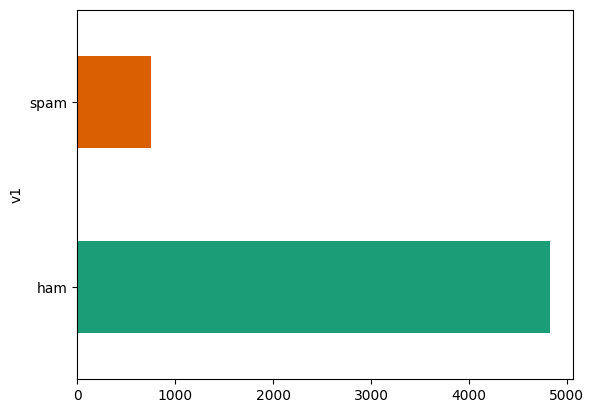

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby(df1['v1']).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [40]:
from nltk import LancasterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stemmer = LancasterStemmer()
stop_words_set = set(stopwords.words('english'))
def clean_data(data):
  data=data.upper()
  data=re.sub(r'[^a-zA-Z]',' ',data)
  data = re.sub(r'\s+@\s+','',data)
  data = re.sub(r'http\S+', '',data)
  data=re.sub(r'@\s+','',data)
  words = nltk.word_tokenize(data)
  data=[stemmer.stem(word) for word in words if word.lower() not in stop_words_set]
  data=' '.join(data)
  return data
df1['v2']=df1['v2'].apply(clean_data)
df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2
0,ham,go jurong point crazy avail bug n gre world la...
1,ham,ok lar jok wif u on
2,spam,fre entry wkly comp win fa cup fin tkts st may...
3,ham,u dun say ear hor u c already say
4,ham,nah think goe usf liv around though


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import the correct submodule
vectorizer = TfidfVectorizer()
x=df1['v2']
y=df1['v1']
x = vectorizer.fit_transform(df1['v2'])
# y = vectorizer.transform(df1['v2'])
print(x)
print(y)

  (0, 5258)	0.19283654037281522
  (0, 138)	0.30766398251848237
  (0, 1936)	0.16523116051609943
  (0, 843)	0.30231450540724525
  (0, 640)	0.34160806429172336
  (0, 2590)	0.28955674925624847
  (0, 5418)	0.2398927871400263
  (0, 1968)	0.19694902685801177
  (0, 642)	0.30231450540724525
  (0, 319)	0.26560646094625057
  (0, 1029)	0.2771314561675723
  (0, 3603)	0.24434866060551197
  (0, 2487)	0.35785163273355786
  (0, 1902)	0.1614872799272903
  (1, 3334)	0.3652466433847848
  (1, 5347)	0.46638528588179506
  (1, 2458)	0.5491350368284438
  (1, 2615)	0.4900300095459219
  (1, 3317)	0.32772085023835684
  (2, 217)	0.18844077416709726
  (2, 3837)	0.18218233685900237
  (2, 5025)	0.14021290081849633
  (2, 4509)	0.22270385437767456
  (2, 3797)	0.18675454731686572
  (2, 3867)	0.18218233685900237
  :	:
  (5567, 3493)	0.2676276806331416
  (5567, 3837)	0.28177797847882197
  (5568, 1499)	0.6485991737677518
  (5568, 1748)	0.5597098620657655
  (5568, 1910)	0.3642369776828009
  (5568, 2155)	0.3652059777476414
 

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test)

(4457, 5575)
(4457,)
(1115, 5575)
(1115,)
  (0, 5519)	0.27099504834032145
  (0, 1680)	0.5296630775125893
  (0, 1455)	0.2551062421874798
  (0, 5465)	0.2511245031003991
  (0, 3357)	0.21940563226822205
  (0, 3609)	0.22090835564032363
  (0, 4916)	0.18813708201774174
  (0, 567)	0.18534162989406902
  (0, 4538)	0.15646893243963642
  (0, 3302)	0.17443004636184614
  (0, 5296)	0.1638415784029441
  (0, 1298)	0.1924850837286681
  (0, 3975)	0.201553938128009
  (0, 1866)	0.12049138713143182
  (0, 1459)	0.24756271611561095
  (0, 913)	0.21658685781903167
  (0, 3000)	0.1583475106845704
  (0, 5025)	0.1519833731556189
  (0, 4769)	0.14447987753188174
  (1, 3850)	0.5773608470301083
  (1, 1870)	0.47333374284778534
  (1, 4211)	0.4963876682373166
  (1, 928)	0.44295474150335296
  (2, 4446)	0.5373036196194634
  (2, 781)	0.4202546751486978
  :	:
  (1111, 5355)	0.1979580485626729
  (1112, 5070)	0.339506525775029
  (1112, 5208)	0.3643307441072666
  (1112, 3715)	0.2967968579733004
  (1112, 1558)	0.3744459339849015


In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

['spam' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [44]:
# Assuming 'y_true' are the true labels for the new data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_pred = encoder.transform(y_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy percentage :", accuracy*100)
print("precision",precision_score(y_test, y_pred))
print("recall",recall_score(y_test, y_pred))
print("f1",f1_score(y_test, y_pred))

Accuracy: 0.9802690582959641
Accuracy percentage : 98.02690582959642
precision 0.9924242424242424
recall 0.8618421052631579
f1 0.9225352112676057
